# Logistic Regression on Titanic data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import sklearn

In [2]:
titanic_data = pd.read_csv('Titanic_1.csv')

In [3]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,Moran,Mr. James,male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,McCarthy,Mr. Timothy J,male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,Palsson,Master. Gosta Leonard,male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,Nasser,Mrs. Nicholas (Adele Achem),female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
titanic_data.shape

(156, 13)

#  Analyize

<AxesSubplot:xlabel='Survived', ylabel='count'>

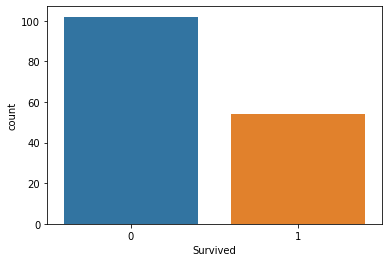

In [5]:
sns.countplot(x='Survived',data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

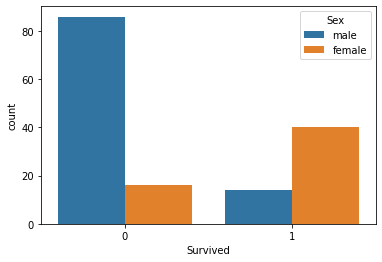

In [6]:
sns.countplot(x='Survived',hue='Sex',data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

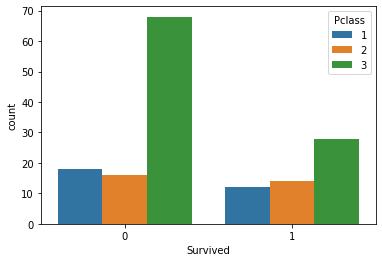

In [7]:
sns.countplot(x='Survived',hue='Pclass',data=titanic_data)

<AxesSubplot:ylabel='Frequency'>

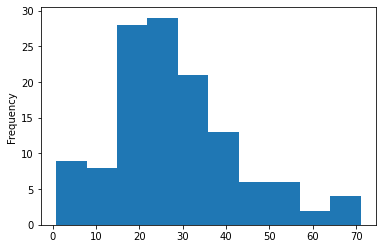

In [8]:
titanic_data['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

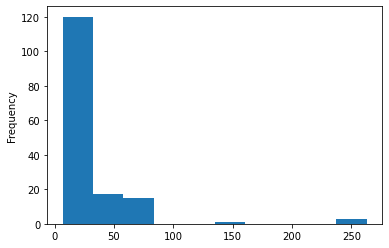

In [9]:
titanic_data['Fare'].plot.hist()

In [10]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Lname        156 non-null    object 
 4   Name         156 non-null    object 
 5   Sex          156 non-null    object 
 6   Age          126 non-null    float64
 7   SibSp        156 non-null    int64  
 8   Parch        156 non-null    int64  
 9   Ticket       156 non-null    object 
 10  Fare         156 non-null    float64
 11  Cabin        31 non-null     object 
 12  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 16.0+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

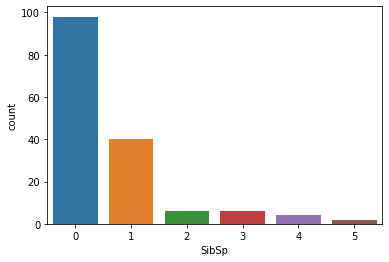

In [11]:
sns.countplot(x='SibSp',data=titanic_data)

In [12]:
nums=[2,7,3,4]
target=9
l=len(nums)
for i in range(0,l):
    for j in range(0,i):
        if nums[i]+nums[j]==target:
            print([i,j])

[1, 0]


In [13]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Lname            0
Name             0
Sex              0
Age             30
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         1
dtype: int64

<AxesSubplot:>

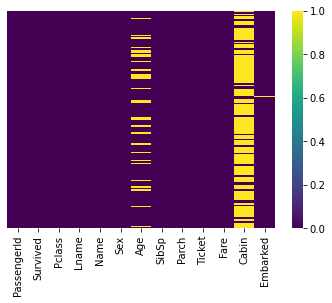

In [14]:
sns.heatmap(titanic_data.isnull(),yticklabels=False, cmap='viridis')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

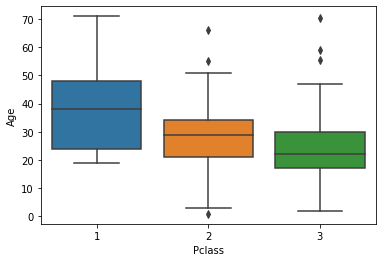

In [15]:
sns.boxplot(x='Pclass',y='Age',data=titanic_data)

In [16]:
titanic_data.head()

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


# Data Wrangling

In [17]:
titanic_data.drop('Cabin',axis=1,inplace=True)

In [18]:
titanic_data.head()

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,S
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,S


In [19]:
titanic_data.dropna(inplace=True)

<AxesSubplot:>

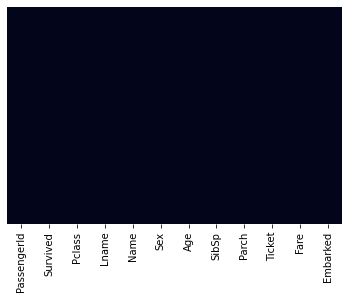

In [20]:
sns.heatmap(titanic_data.isnull(),yticklabels=False, cbar=False)

In [21]:
titanic_data.head()

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,S
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,S


In [22]:
sex=pd.get_dummies(titanic_data['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [23]:
embarked=pd.get_dummies(titanic_data['Embarked'],drop_first=True)
embarked.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [24]:
Pcl=pd.get_dummies(titanic_data['Pclass'],drop_first=True)
Pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [25]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Lname', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [26]:
# Remove unwanted columns
titanic_data.drop(['Sex','Embarked','PassengerId','Lname','Name','Ticket'],axis=1,inplace=True)

In [27]:
titanic_data.drop('Pclass',axis=1,inplace=True)

In [28]:
#add new columns
titanic_data=pd.concat([titanic_data,sex,embarked,Pcl],axis=1)

In [29]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


# Train Data

In [30]:
#first identify Daependent and independent varriable 
X= titanic_data.drop('Survived',axis=1)
y= titanic_data['Survived']

In [31]:
X.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,1,0,0
4,35.0,0,0,8.0500,1,0,1,0,1


In [32]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [35]:
X_train

array([[-9.73107951e-01,  2.28704586e-01, -4.93741931e-01,
        -4.63791409e-01, -1.39326109e+00, -2.04124145e-01,
        -1.88293774e+00, -5.46535725e-01,  9.04534034e-01],
       [-6.23905698e-01,  2.28704586e-01,  6.81834095e-01,
         1.02866832e-01,  7.17740563e-01, -2.04124145e-01,
         5.31085005e-01,  1.82970656e+00, -1.10554160e+00],
       [-9.73107951e-01, -6.50928437e-01, -4.93741931e-01,
        -5.39043573e-01, -1.39326109e+00, -2.04124145e-01,
         5.31085005e-01, -5.46535725e-01,  9.04534034e-01],
       [-1.74135291e+00,  2.28704586e-01,  1.85741012e+00,
         2.10145874e-01, -1.39326109e+00, -2.04124145e-01,
        -1.88293774e+00,  1.82970656e+00, -1.10554160e+00],
       [ 4.23701062e-01, -6.50928437e-01,  6.81834095e-01,
        -2.02584759e-01, -1.39326109e+00, -2.04124145e-01,
         5.31085005e-01,  1.82970656e+00, -1.10554160e+00],
       [ 4.65835806e-03,  2.28704586e-01, -4.93741931e-01,
         1.11187451e+00,  7.17740563e-01, -2.041241

In [36]:
y_train

39     1
145    0
14     0
43     1
98     1
      ..
89     0
85     1
147    0
63     0
59     0
Name: Survived, Length: 100, dtype: int64

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logmodel= LogisticRegression()

In [39]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [40]:
predictions = logmodel.predict(X_test)

In [50]:
logmodel.predict(scaler.transform([[35.0,1,0,53.1000,0,0,1,0,0]]))

array([1], dtype=int64)

In [41]:
from sklearn.metrics import classification_report

In [42]:
report=classification_report(y_test,predictions)

In [43]:
print(report)

              precision    recall  f1-score   support

           0       0.55      1.00      0.71        11
           1       1.00      0.36      0.53        14

    accuracy                           0.64        25
   macro avg       0.78      0.68      0.62        25
weighted avg       0.80      0.64      0.61        25



In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
confusion_matrix(y_test,predictions)

array([[11,  0],
       [ 9,  5]], dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_test,predictions)

0.64

# ##########################################################

# 2} SUV Prediction

Prepared by Mahsa Sadi on 2020 - 06 - 24

In this notebook, we perform two steps:

1} Reading and visualizng SUV Data

2} Modeling SUV data using logistic Regression:
   SUV dataset conatins information about customers and whether they   purchase an SUV or not.

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import sklearn

In [53]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [54]:
df= pd.read_csv('suv_data.csv')

In [55]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [56]:
df.shape

(400, 5)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [58]:
df.groupby('Purchased').size()

Purchased
0    257
1    143
dtype: int64

In [59]:
#remove unwanted 
df1=df.drop(columns = ['User ID'],axis=1)

In [60]:
df1.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [61]:
df1.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Visualizing Data

<AxesSubplot:xlabel='Purchased', ylabel='count'>

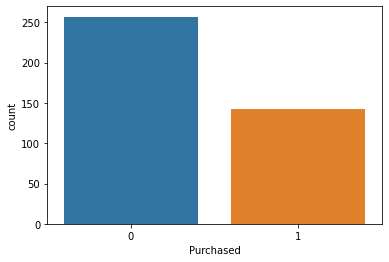

In [62]:
sns.countplot(x='Purchased', data=df1)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

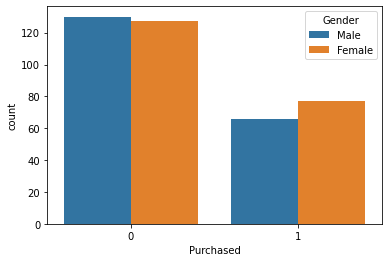

In [63]:
sns.countplot(x= 'Purchased', hue= 'Gender', data = df1)

<AxesSubplot:>

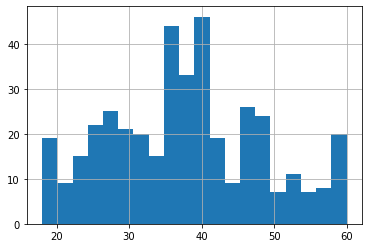

In [64]:
df1['Age'].hist(bins=20)

In [65]:
age_category = []
for i in range (0, len  (df ['Age'])):
    if df1 ['Age'][i] <= 20:
        age_category.append ('A');
    elif 20 < df1 ['Age'][i] <= 26:
        age_category.append ('B');
    elif 26 < df1 ['Age'][i] <= 30:
        age_category.append ('C');
    elif 30 < df1 ['Age'][i] <= 40:
        age_category.append ('D');
    elif 40 < df1 ['Age'][i] <= 50:
        age_category.append ('E');
    else:
        age_category.append ('F');

age_df = pd.DataFrame (data = age_category, columns = ['AgeCategory'])
augu_df = pd.concat([df1, age_df], axis = 1)
augu_df.head()

,Gender,Age,EstimatedSalary,Purchased,AgeCategory
0,Male,19,19000,0,A
1,Male,35,20000,0,D
2,Female,26,43000,0,B
3,Female,27,57000,0,C
4,Male,19,76000,0,A


In [66]:
augu_df.groupby('AgeCategory').size()

AgeCategory
A     19
B     46
C     46
D    142
E     98
F     49
dtype: int64

<AxesSubplot:xlabel='Purchased', ylabel='count'>

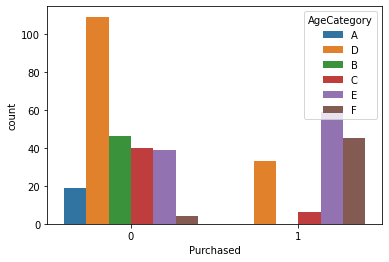

In [67]:
sns.countplot ( x = 'Purchased', hue = 'AgeCategory', data = augu_df)

## => People younger than 20 year old don't buy a SUV.
## => People between 20 and 26 years old don't buy SUV.
## => People younger than 26 don't buy SUVs.
## => Most of the people buying SUV are between 40 to 60 years old.

<AxesSubplot:>

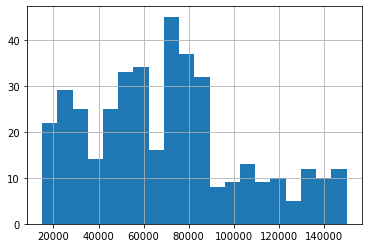

In [68]:
df ['EstimatedSalary'].hist(bins = 20)

In [69]:
income_category = []
for i in range (0, len  (df ['EstimatedSalary'])):
    if df1 ['EstimatedSalary'][i] <= 19500:
        income_category.append ('Very Low');
    elif 19500 < df1 ['EstimatedSalary'][i] <= 40000:
        income_category.append ('Low');
    elif 40000 < df1 ['EstimatedSalary'][i] <= 60000:
        income_category.append ('Moderately Low');
    elif 60000 < df1 ['EstimatedSalary'][i] <= 80000:
        income_category.append ('Medium');
    elif 80000 < df1 ['EstimatedSalary'][i] <= 100000:
        income_category.append ('Moderately high');
    elif 100000 < df1 ['EstimatedSalary'][i] <= 130000:
        income_category.append ('Very High');
    elif 130000 < df1 ['EstimatedSalary'][i] <= 145000:
        income_category.append ('Very High');
    else:
        income_category.append ('Extremely High');

income_data_frame = pd.DataFrame (data = income_category, columns = ['IncomeCategory'])
augu_df_2 = pd.concat([augu_df, income_data_frame], axis = 1)
augu_df_2.head()

,Gender,Age,EstimatedSalary,Purchased,AgeCategory,IncomeCategory
0,Male,19,19000,0,A,Very Low
1,Male,35,20000,0,D,Low
2,Female,26,43000,0,B,Moderately Low
3,Female,27,57000,0,C,Moderately Low
4,Male,19,76000,0,A,Medium


In [70]:
augu_df_2.groupby(['IncomeCategory','Purchased']).size()

IncomeCategory   Purchased
Extremely High   1             8
Low              0            37
                 1            35
Medium           0            85
                 1            13
Moderately Low   0            75
                 1            12
Moderately high  0            34
                 1            21
Very High        0            11
                 1            54
Very Low         0            15
dtype: int64

<AxesSubplot:xlabel='Purchased', ylabel='count'>

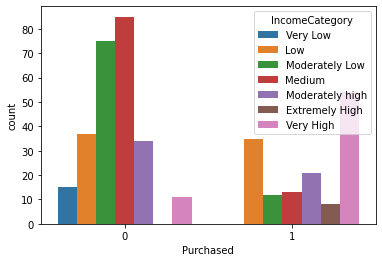

In [71]:
sns.countplot( x = 'Purchased', hue = 'IncomeCategory', data= augu_df_2)

## => People with salary lower than 19000 never buy SUV
## => Peple with salary higher than 145000 will buy SUV's
## => Majority of people buying SUV's have salaries between 100000 to 130000

In [72]:
binary_gender = pd.get_dummies (augu_df_2 ['Gender'],drop_first = True)
binary_gender.head ()

,Male
0,1
1,1
2,0
3,0
4,1


In [73]:
binary_age = pd.get_dummies (augu_df_2 ['AgeCategory'])
binary_age.head ()

,A,B,C,D,E,F
0,1,0,0,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,1,0,0,0,0,0


In [74]:
binary_income = pd.get_dummies (augu_df_2 ['IncomeCategory'])
binary_income.head ()

,Extremely High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low
0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0


In [75]:
# add new columns
final_df_1 = pd.concat ([augu_df_2, binary_age, binary_gender, binary_income], axis = 1)
final_df_1

,Gender,Age,EstimatedSalary,Purchased,AgeCategory,IncomeCategory,A,B,C,D,E,F,Male,Extremely High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low
0,Male,19,19000,0,A,Very Low,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,Male,35,20000,0,D,Low,0,0,0,1,0,0,1,0,1,0,0,0,0,0
2,Female,26,43000,0,B,Moderately Low,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,Female,27,57000,0,C,Moderately Low,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,Male,19,76000,0,A,Medium,1,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Female,46,41000,1,E,Moderately Low,0,0,0,0,1,0,0,0,0,0,1,0,0,0
396,Male,51,23000,1,F,Low,0,0,0,0,0,1,1,0,1,0,0,0,0,0
397,Female,50,20000,1,E,Low,0,0,0,0,1,0,0,0,1,0,0,0,0,0
398,Male,36,33000,0,D,Low,0,0,0,1,0,0,1,0,1,0,0,0,0,0


In [76]:
final_df_2 = final_df_1.drop (columns = ['Age', 'Gender', 'EstimatedSalary', 'IncomeCategory', 'AgeCategory'], axis = 1)

In [77]:
final_df_2.head()

,Purchased,A,B,C,D,E,F,Male,Extremely High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0


# Modeling Data
## Modeling the data considering all the features available in the dataset

In [78]:
Y = final_df_2['Purchased']
X = final_df_2.drop(columns = ['Purchased'], axis =1)

In [79]:
X.head()

,A,B,C,D,E,F,Male,Extremely High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low
0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,1,0,0,0,0


In [80]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [81]:
test_set_size = 0.2
seed = 0

In [82]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X,Y, test_size = test_set_size, random_state = seed)

In [83]:
model = LogisticRegression(solver = 'liblinear')
model.fit (X_train, Y_train)

LogisticRegression(solver='liblinear')

In [84]:
X_test

,A,B,C,D,E,F,Male,Extremely High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low
132,0,0,1,0,0,0,1,0,0,0,0,1,0,0
309,0,0,0,1,0,0,0,0,0,0,1,0,0,0
341,0,0,0,1,0,0,1,0,0,1,0,0,0,0
196,0,0,1,0,0,0,0,0,0,1,0,0,0,0
246,0,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,1,0,0,0,0,0,1,0,0,0,0,1,0,0
363,0,0,0,0,1,0,0,0,0,1,0,0,0,0
304,0,0,0,1,0,0,0,0,0,0,1,0,0,0
361,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [85]:
predictions = model.predict (X_test)

In [86]:
report = classification_report (Y_test, predictions)
print (report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        58
           1       0.91      0.91      0.91        22

    accuracy                           0.95        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.95      0.95      0.95        80



In [87]:
print (confusion_matrix (Y_test, predictions))

[[56  2]
 [ 2 20]]


In [88]:
accuracy_score (Y_test, predictions)

0.95

### Modeling the data considering some of the features available in the dataset

In [89]:
Y = df.iloc [:, 4]
X = df.iloc [:, 2:4]

In [107]:
X.head(10)

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
5,27,58000
6,27,84000
7,32,150000
8,25,33000
9,35,65000


In [106]:
Y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    0
9    0
Name: Purchased, dtype: int64

In [92]:
x=X["Age"]

<AxesSubplot:xlabel='Age', ylabel='Purchased'>

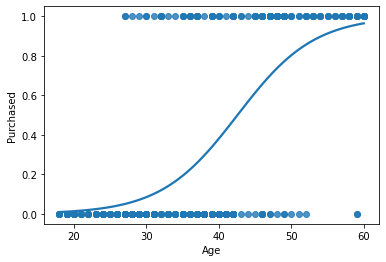

In [93]:
sns.regplot(x=x, y=Y, data=df, logistic=True, ci=None)

In [94]:
x1=X['EstimatedSalary']

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Purchased'>

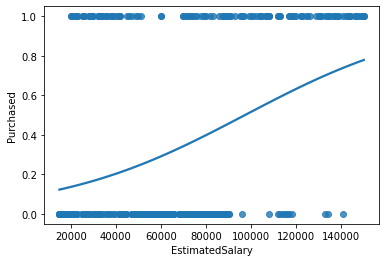

In [95]:
sns.regplot(x=x1, y=Y, data=df, logistic=True, ci=None)

In [97]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X,Y, test_size = 0.33, random_state = 7)

Since the values of the estimated salary feature are in a wide range we need to scale the values.

In [98]:
scaler = StandardScaler ()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [99]:
classifier = LogisticRegression (random_state = seed, solver = 'liblinear')
classifier.fit (X_train, Y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [100]:
predictions = classifier.predict (X_test)

In [101]:
report=classification_report (Y_test, predictions)

In [102]:
print(report)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        58
           1       0.76      0.86      0.81        22

    accuracy                           0.89        80
   macro avg       0.85      0.88      0.86        80
weighted avg       0.89      0.89      0.89        80



In [103]:
accuracy_score (Y_test, predictions)

0.8875

=> Considering all features provides a better accuracy and a better prediction model of the data.

In [114]:
classifier.predict (scaler.transform([[34,90000]]))

array([0], dtype=int64)

In [105]:
X_train

array([[ 1.92295008e+00,  2.14601566e+00],
       [ 2.02016082e+00,  3.78719297e-01],
       [-1.38221530e+00, -4.32498705e-01],
       [-1.18779381e+00, -1.01194013e+00],
       [ 1.92295008e+00, -9.25023920e-01],
       [ 3.67578135e-01,  2.91803083e-01],
       [ 1.73156642e-01,  1.46942725e-01],
       [ 2.02016082e+00,  1.74040666e+00],
       [ 7.56421121e-01, -8.38107706e-01],
       [ 2.70367388e-01, -2.87638347e-01],
       [ 3.67578135e-01, -1.71750061e-01],
       [-1.18475597e-01,  2.20395980e+00],
       [-1.47942605e+00, -6.35303205e-01],
       [-1.28500455e+00, -1.06988428e+00],
       [-1.38221530e+00,  4.07691369e-01],
       [-1.09058306e+00,  7.55356227e-01],
       [-1.47942605e+00, -2.00722133e-01],
       [ 9.50842613e-01, -1.06988428e+00],
       [ 9.50842613e-01,  5.81523798e-01],
       [ 3.67578135e-01,  9.87132798e-01],
       [ 5.61999628e-01, -8.96051849e-01],
       [-6.04529329e-01,  1.45068594e+00],
       [-2.12648508e-02, -5.77359062e-01],
       [-6.